# Recommender Project Solutions

## 1. Data Prep

In [1]:
# import the restaurant ratings data (first tab of spreadsheet)
import pandas as pd

restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx')
print(restaurant_ratings.shape)
restaurant_ratings.head()

(1161, 4)


,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


In [2]:
# view the range of the ratings
restaurant_ratings.describe()

,Restaurant_ID,Overall_Rating
count,1161.000000,1161.000000
mean,134192.041344,1.199828
std,1100.916275,0.773282
min,132560.000000,0.000000
25%,132856.000000,1.000000
50%,135030.000000,1.000000
75%,135059.000000,2.000000
max,135109.000000,2.000000


In [3]:
restaurant_ratings.isnull().sum()

Consumer_ID        0
Restaurant_ID      0
Restaurant_Name    0
Overall_Rating     0
dtype: int64

In [4]:
restaurant_ratings.head(2)

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2


In [7]:
# pivot the data to get it into a user-item matrix format
X_ = restaurant_ratings.pivot(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating')
X_.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
U1003,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Deal with the NaN values
X = X_.fillna(restaurant_ratings.Overall_Rating.mean())
X.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,1.199828
U1002,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.000000,1.199828,1.199828,1.199828
U1003,1.199828,1.199828,2.000000,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1004,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1005,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828


In [9]:
# check the number of rows and columns in the data
X.shape

(138, 127)

## 2. Collaborative Filtering: Recommend Restaurants to a New User

### a. Fit an initial TruncatedSVD model with all the components on centered data

In [10]:
# center the data
X_centered = X - X.mean()
X_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-1.234655,0.021733,0.034765,0.02026
U1002,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.234655,0.021733,0.034765,0.02026
U1003,0.060855,0.004344,0.775518,0.013038,0.02172,0.772629,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1004,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,0.779875,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1005,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [11]:
# fit a TruncatedSVD model with 127 components
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=127)
svd.fit(X_centered)

TruncatedSVD(n_components=127)

In [12]:
# view the cumulative explained variance ratios
import numpy as np

cum_evr = list(zip(range(1, 128), np.cumsum(svd.explained_variance_ratio_))) # hits 85% ~50 components
cum_evr

[(1, 0.09789976117857938),
 (2, 0.14684294770514844),
 (3, 0.1847365409958742),
 (4, 0.22017870915004636),
 (5, 0.2527808047625425),
 (6, 0.2828694053260626),
 (7, 0.311190355137655),
 (8, 0.3376564575874435),
 (9, 0.3630647344261423),
 (10, 0.38800344996033675),
 (11, 0.4119087552801593),
 (12, 0.43391368576217576),
 (13, 0.4544080748536446),
 (14, 0.473868054410989),
 (15, 0.49279631603246),
 (16, 0.5109973260153454),
 (17, 0.5290984440967375),
 (18, 0.5462699955047432),
 (19, 0.5629679869595816),
 (20, 0.5784644747152562),
 (21, 0.5936017969312494),
 (22, 0.6079194465519558),
 (23, 0.6216511037573913),
 (24, 0.6347357062723563),
 (25, 0.647515977110339),
 (26, 0.6600360165396331),
 (27, 0.6719903626490077),
 (28, 0.6838570022072101),
 (29, 0.695191966522355),
 (30, 0.7063456823305625),
 (31, 0.7171761442272889),
 (32, 0.7276373557707783),
 (33, 0.7377275662306018),
 (34, 0.747551415631659),
 (35, 0.7570697018579103),
 (36, 0.7665668431409123),
 (37, 0.7758901517798568),
 (38, 0.7845

In [17]:
# Create a DataFrame and set the index using an existing column (column 0)
cum_evr_df = pd.DataFrame(cum_evr)
display(cum_evr_df.head(3))
cum_evr_df.set_index(0, inplace=True)
cum_evr_df.head(3)

,0,1
0,1,0.097900
1,2,0.146843
2,3,0.184737


,1
0,
1,0.097900
2,0.146843
3,0.184737


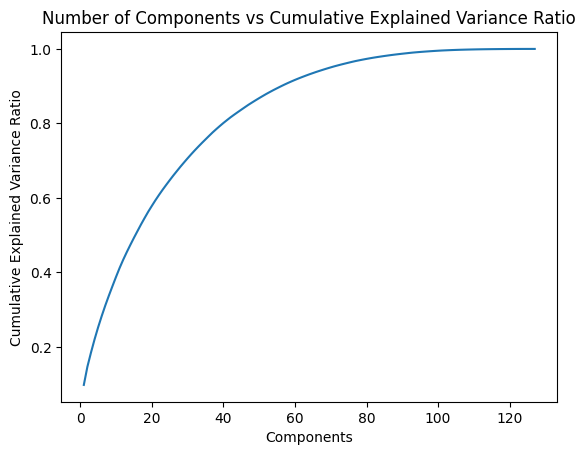

In [18]:
# plot the cumulative explained variance ratios
cum_evr_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

### b. Update the model to have 50 components

In [19]:
# fit a TruncatedSVD model with 50 components
svd50 = TruncatedSVD(n_components=50, random_state=42)
svd50.fit(X_centered)

TruncatedSVD(n_components=50, random_state=42)

In [20]:
# view the cumulative explained variance ratios
sum(svd50.explained_variance_ratio_)

0.8678700920604596

### c. Introduce a New User

In [21]:
# create a new user
import numpy as np

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 2 restaurant ratings
ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# view only the restaurants that the new user rated
new_user_df.T.dropna()

,0
Restaurant_Name,
KFC,2.0
McDonalds Centro,2.0


In [23]:
# read in the restaurants details (second tab of spreadsheet)
restaurant_details = pd.read_excel('../Data/restaurant_ratings.xlsx', sheet_name=1)
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [24]:
# the new user likes low-priced American chain restaurants
new_user_rated_restaurants = new_user_df.T.dropna().index
print(new_user_rated_restaurants)
restaurant_details[restaurant_details.Name.isin(new_user_rated_restaurants)]

Index(['KFC', 'McDonalds Centro'], dtype='object', name='Restaurant_Name')


,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


### d. Recommend Restaurants to the New User

In [25]:
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# apply the necessary data prep steps to the user (this must be identical to the steps applied to the main dataset)

# fill nan values with the mean rating
average_rating = restaurant_ratings.Overall_Rating.mean()
print(average_rating)
new_user_fillna_df = new_user_df.fillna(average_rating)

# center the data
new_user_centered_df = new_user_fillna_df - X.mean()
new_user_centered_df

1.1998277347114557


Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [29]:
# transform the user into the latent space
new_user_50d = svd50.transform(new_user_centered_df)
new_user_50d

array([[ 0.02115743,  0.04969652, -0.08540725, -0.02961734,  0.00382527,
        -0.02802256, -0.07113824, -0.03172087, -0.05515816,  0.07840488,
        -0.14778456,  0.10698065, -0.06247656, -0.04088976, -0.04408533,
         0.06324401,  0.06072488,  0.1295427 , -0.01312511,  0.14901486,
         0.06163375,  0.08630824, -0.03593227, -0.16119104, -0.04376569,
         0.07084647, -0.11975015, -0.03138061,  0.02780728, -0.01978177,
        -0.04790303,  0.04127567, -0.06430559, -0.04421692, -0.10483587,
        -0.01422439,  0.12945996, -0.02856834, -0.0557925 , -0.02658448,
        -0.04130547, -0.06929867,  0.0199994 ,  0.01214491,  0.0514906 ,
         0.02841979, -0.01154362,  0.01173938,  0.07389271, -0.02072922]])

In [30]:
# view the shape of the output (1 user x 50 latent features)
new_user_50d.shape

(1, 50)

In [33]:
# reconstruct the user-item matrix for the user
new_user_pred = np.dot(new_user_50d, svd50.components_)
new_user_pred #[0][:5]

array([[ 0.03147782,  0.00310059, -0.02111374,  0.00125429,  0.05050927,
         0.00321722, -0.04647324, -0.00471508, -0.00694631,  0.00194564,
         0.01544114, -0.00075144,  0.01548931,  0.00986963,  0.06060504,
         0.11647914,  0.00110047, -0.00460171, -0.00248894, -0.10553795,
        -0.028146  , -0.00340582, -0.01996653, -0.00767098, -0.01738599,
         0.05837284, -0.00946808, -0.00345562, -0.00077795, -0.02967008,
        -0.01594493, -0.01913728, -0.01818836,  0.00062409,  0.02114165,
         0.02127876,  0.00475285,  0.01997595, -0.01325903,  0.0455466 ,
         0.14196341, -0.00853431, -0.000202  ,  0.00124509, -0.00390263,
        -0.01661769, -0.10182497,  0.01273866, -0.00374663, -0.0074357 ,
        -0.03422059, -0.00967205,  0.00620955,  0.00189414, -0.02303398,
        -0.0171348 ,  0.00928981, -0.01671059, -0.05164286,  0.10481166,
         0.12362652,  0.02122121,  0.00620621, -0.01225074, -0.00111717,
         0.00554299,  0.00497555,  0.00846397,  0.0

In [34]:
# view the shape of the output (1 user x 127 predicted ratings)
new_user_pred.shape

(1, 127)

In [35]:
# make restaurant recommendations for the new user
new_user_recs = pd.DataFrame(new_user_pred, columns=X.columns)
new_user_recs

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.031478,0.003101,-0.021114,0.001254,0.050509,0.003217,-0.046473,-0.004715,-0.006946,0.001946,...,0.015779,0.006801,0.002858,-0.021743,0.022406,0.008551,-0.030885,-0.11428,0.021717,0.089591


In [36]:
# sort the recommendations
top_recs = new_user_recs.T.sort_values(by=0, ascending=False)
top_recs.columns = ['Predicted_Rating']
top_recs.reset_index(inplace=True)
top_recs.head(10)

,Restaurant_Name,Predicted_Rating
0,KFC,0.141963
1,Potzocalli,0.131079
2,McDonalds Centro,0.123627
3,Chilis Cuernavaca,0.116479
4,Restaurant And Bar And Clothesline Carlos N Ch...,0.115744
5,Restaurante Y Pescaderia Tampico,0.110840
6,Restaurant Teely,0.109476
7,Mariscos Tia Licha,0.104812
8,Vips,0.089591
9,Sirlone,0.075019


In [37]:
# exclude the restaurants the user already rated
already_rated = new_user_df.T.dropna().index
already_rated

Index(['KFC', 'McDonalds Centro'], dtype='object', name='Restaurant_Name')

In [38]:
# view the new recommended restaurants
top_recs_final = top_recs[~top_recs.Restaurant_Name.isin(already_rated)]
top_recs_final.head(10)

,Restaurant_Name,Predicted_Rating
1,Potzocalli,0.131079
3,Chilis Cuernavaca,0.116479
4,Restaurant And Bar And Clothesline Carlos N Ch...,0.115744
5,Restaurante Y Pescaderia Tampico,0.110840
6,Restaurant Teely,0.109476
7,Mariscos Tia Licha,0.104812
8,Vips,0.089591
9,Sirlone,0.075019
10,Chaires,0.060605
11,El Lechon Potosino,0.058373


In [39]:
# view the restaurant details dataframe
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [40]:
# combine the predicted ratings and restaurant details tables
(top_recs_final.merge(restaurant_details, how='left', left_on='Restaurant_Name', right_on='Name')
               .drop(columns='Name')
               .head(10))

,Restaurant_Name,Predicted_Rating,Restaurant_ID,Cuisine,Price,Franchise
0,Potzocalli,0.131079,135108.0,NaN,Low,No
1,Chilis Cuernavaca,0.116479,134987.0,NaN,Medium,No
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.115744,134983.0,Bar,High,No
3,Restaurante Y Pescaderia Tampico,0.110840,135054.0,Seafood,High,No
4,Restaurant Teely,0.109476,134992.0,NaN,High,No
5,Mariscos Tia Licha,0.104812,132768.0,Family,Medium,Yes
6,Vips,0.089591,132951.0,American,Low,Yes
7,Sirlone,0.075019,132854.0,International,Medium,No
8,Chaires,0.060605,132866.0,Bakery,Medium,No
9,El Lechon Potosino,0.058373,132846.0,International,Low,No


In [41]:
# what are your thoughts on these recommendations?

## Potzocalli is low priced, so that makes sense
## Chili's is a franchise, even though it isn't labeled as such, and that makes sense
## The high priced restaurants don't make sense
## Vips is another American, low priced franchise, so that makes a lot of sense

## 3. Content-Based Filtering: Suggest Similar Restaurants to a Restaurant

### a. Prep the data to contain only numeric values

In [42]:
# turn the cuisine, price and franchise columns of the restaurant details data into numeric columns
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [43]:
# turn cuisine into dummy variables
cuisine_num = pd.get_dummies(restaurant_details.Cuisine).astype(int)
cuisine_num.head()

,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,Family,Fast Food,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# turn price into a numeric value
price_num = pd.DataFrame(np.where(restaurant_details.Price == 'High', 1,
                         np.where(restaurant_details.Price == 'Medium', 0, -1)),
                         columns=['Price'])
price_num.head()

,Price
0,-1
1,0
2,0
3,-1
4,-1


In [45]:
# turn franchise into an indicator
franchise_num = pd.DataFrame(np.where(restaurant_details.Franchise == 'Yes', 1, 0), columns=['Franchise'])
franchise_num.head()

,Franchise
0,0
1,0
2,0
3,0
4,0


In [47]:
# combine them into a single dataframe
restaurant_details_df = pd.concat([cuisine_num, price_num, franchise_num], axis=1).set_index(restaurant_details.Name)
display(restaurant_details.head(2))
restaurant_details_df.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No


,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese,Price,Franchise
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Cafe Chaires,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-1,0


### b. Calculate the cosine similarities between rows

In [48]:
# calculate all the cosine similarities
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(restaurant_details_df)

# display the results
cosine_df = pd.DataFrame(cosine_matrix, index=restaurant_details_df.index, columns=restaurant_details_df.index).reset_index()
cosine_df

Name,Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,Abondance Restaurante Bar,1.000000,0.0,0.0,0.707107,0.500000,0.000000,0.500000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,0.500000,0.408248
1,Arrachela Grill,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,Cabana Huasteca,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.707107,0.707107,0.000000,0.707107,0.0,0.0,0.000000,0.000000,0.000000
3,Cafe Ambar,0.707107,0.0,0.0,1.000000,0.707107,0.000000,0.707107,0.000000,0.000000,...,0.707107,0.707107,0.707107,0.577350,0.707107,0.0,0.0,0.707107,0.707107,0.577350
4,Cafe Chaires,0.500000,0.0,0.0,0.707107,1.000000,0.707107,1.000000,0.707107,0.000000,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,0.500000,0.408248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Tortas Hawaii,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000
123,Tortas Locas Hipocampo,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000
124,Tortas Y Hamburguesas El Gordo,0.500000,0.0,0.0,0.707107,0.500000,0.000000,0.500000,0.000000,0.500000,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,1.000000,0.500000,0.408248
125,Unicol's Pizza,0.500000,0.0,0.0,0.707107,0.500000,0.000000,0.500000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,1.000000,0.408248


In [49]:
# find the most similar restuarants to KFC
kfc_recs = cosine_df[['Name', 'KFC']].sort_values(by='KFC', ascending=False)
kfc_recs.head(10)

Name,Name,KFC
126,Vips,1.000000
60,McDonalds Centro,1.000000
40,KFC,1.000000
120,Tacos Los Volcanes,1.000000
111,Sirloin Stockade,0.816497
18,Dairy Queen,0.816497
16,Church's,0.816497
31,Emilianos,0.666667
113,Subway,0.666667
68,Pollo Frito Buenos Aires,0.666667


In [50]:
# find the details of those restaurants
kfc_recs.merge(restaurant_details).head(10)

,Name,KFC,Restaurant_ID,Cuisine,Price,Franchise
0,Vips,1.000000,132951.0,American,Low,Yes
1,McDonalds Centro,1.000000,132583.0,American,Low,Yes
2,KFC,1.000000,132851.0,American,Low,Yes
3,Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
4,Sirloin Stockade,0.816497,132877.0,NaN,Low,Yes
5,Dairy Queen,0.816497,132884.0,NaN,Low,Yes
6,Church's,0.816497,132564.0,NaN,Low,Yes
7,Emilianos,0.666667,132955.0,Brewery,Low,Yes
8,Subway,0.666667,135021.0,Fast Food,Low,Yes
9,Pollo Frito Buenos Aires,0.666667,132609.0,Fast Food,Low,Yes


In [51]:
# what are your thoughts on these recommendations? the top recs are good since they are also american franchises

## 4. Summarize Recommendations

In [52]:
# For the user who likes KFC and McDonalds, what are your top 10 restaurant recommendations?
(top_recs_final.merge(restaurant_details, how='left', left_on='Restaurant_Name', right_on='Name')
               .drop(columns='Name')
               .head(10))

,Restaurant_Name,Predicted_Rating,Restaurant_ID,Cuisine,Price,Franchise
0,Potzocalli,0.131079,135108.0,NaN,Low,No
1,Chilis Cuernavaca,0.116479,134987.0,NaN,Medium,No
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.115744,134983.0,Bar,High,No
3,Restaurante Y Pescaderia Tampico,0.110840,135054.0,Seafood,High,No
4,Restaurant Teely,0.109476,134992.0,NaN,High,No
5,Mariscos Tia Licha,0.104812,132768.0,Family,Medium,Yes
6,Vips,0.089591,132951.0,American,Low,Yes
7,Sirlone,0.075019,132854.0,International,Medium,No
8,Chaires,0.060605,132866.0,Bakery,Medium,No
9,El Lechon Potosino,0.058373,132846.0,International,Low,No


What are your thoughts on these recommendations and how could you improve your recommendations?
* the first two make sense, but the next few do not
* try refitting the SVD model with different parameters
* maybe try different data prep steps
* maybe filter out expensive restaurants
* consider a hybrid approach using the cosine similarity results

In [53]:
# For the KFC details page, what are the top 10 other restuarants that you would suggest?
kfc_recs.merge(restaurant_details).head(10)

,Name,KFC,Restaurant_ID,Cuisine,Price,Franchise
0,Vips,1.000000,132951.0,American,Low,Yes
1,McDonalds Centro,1.000000,132583.0,American,Low,Yes
2,KFC,1.000000,132851.0,American,Low,Yes
3,Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
4,Sirloin Stockade,0.816497,132877.0,NaN,Low,Yes
5,Dairy Queen,0.816497,132884.0,NaN,Low,Yes
6,Church's,0.816497,132564.0,NaN,Low,Yes
7,Emilianos,0.666667,132955.0,Brewery,Low,Yes
8,Subway,0.666667,135021.0,Fast Food,Low,Yes
9,Pollo Frito Buenos Aires,0.666667,132609.0,Fast Food,Low,Yes


What are your thoughts on these suggestions and how could you improve your suggestions?
* these all make sense
* consider a hybrid approach to introduce some non-obvious choices
* consider introducing additional features like distance from the restaurant